In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aiornot/train.csv
/kaggle/input/aiornot/test.csv
/kaggle/input/aiornot/test/31973.jpg
/kaggle/input/aiornot/test/30778.jpg
/kaggle/input/aiornot/test/19812.jpg
/kaggle/input/aiornot/test/22735.jpg
/kaggle/input/aiornot/test/38246.jpg
/kaggle/input/aiornot/test/16916.jpg
/kaggle/input/aiornot/test/39500.jpg
/kaggle/input/aiornot/test/7981.jpg
/kaggle/input/aiornot/test/34410.jpg
/kaggle/input/aiornot/test/39101.jpg
/kaggle/input/aiornot/test/22706.jpg
/kaggle/input/aiornot/test/20513.jpg
/kaggle/input/aiornot/test/12666.jpg
/kaggle/input/aiornot/test/13288.jpg
/kaggle/input/aiornot/test/20088.jpg
/kaggle/input/aiornot/test/36417.jpg
/kaggle/input/aiornot/test/37459.jpg
/kaggle/input/aiornot/test/6234.jpg
/kaggle/input/aiornot/test/36765.jpg
/kaggle/input/aiornot/test/38745.jpg
/kaggle/input/aiornot/test/28578.jpg
/kaggle/input/aiornot/test/1269.jpg
/kaggle/input/aiornot/test/41537.jpg
/kaggle/input/aiornot/test/38264.jpg
/kaggle/input/aiornot/test/22288.jpg
/kaggle/input/a

In [95]:
!pip install numpy==1.22.0

  Using cached numpy-1.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
Using cached numpy-1.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
keras-nlp 0.9.3 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
albumentation

In [96]:
!pip install --upgrade scipy

  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
keras-nlp 0.9.3 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.

In [97]:
# adamW
!pip install tensorflow-addons

In [98]:
import pandas as pd
import numpy as np
import glob
from skimage.io import imread
import os
import shutil
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from sklearn.model_selection import train_test_split

In [99]:
#이미지 파일 + csv 파일 합치기
train_dir = '/kaggle/input/aiornot/train'
df = pd.DataFrame({'path': glob.glob(os.path.join(train_dir, '*.jpg'))})
df['id'] = df.path.map(lambda x: x.split('/')[5])  # 이미지 경로에서 .jpg 앞에 파일명 가져오기
labels = pd.read_csv("/kaggle/input/aiornot/train.csv")
labels['id'] = labels['id'].astype('str')
labels = labels.sort_values(by=['id'], ignore_index = True)
df['id'] = df['id'].astype('str')
df = df.sort_values(by=['id'], ignore_index = True)
df_data = pd.merge(labels, df, on="id")

In [100]:
df_data

id  label                                  path
0         0.jpg      1     /kaggle/input/aiornot/train/0.jpg
1         1.jpg      1     /kaggle/input/aiornot/train/1.jpg
2        10.jpg      1    /kaggle/input/aiornot/train/10.jpg
3       100.jpg      0   /kaggle/input/aiornot/train/100.jpg
4      1000.jpg      0  /kaggle/input/aiornot/train/1000.jpg
...         ...    ...                                   ...
18613  9995.jpg      0  /kaggle/input/aiornot/train/9995.jpg
18614  9996.jpg      0  /kaggle/input/aiornot/train/9996.jpg
18615  9997.jpg      1  /kaggle/input/aiornot/train/9997.jpg
18616  9998.jpg      1  /kaggle/input/aiornot/train/9998.jpg
18617  9999.jpg      0  /kaggle/input/aiornot/train/9999.jpg

[18618 rows x 3 columns]

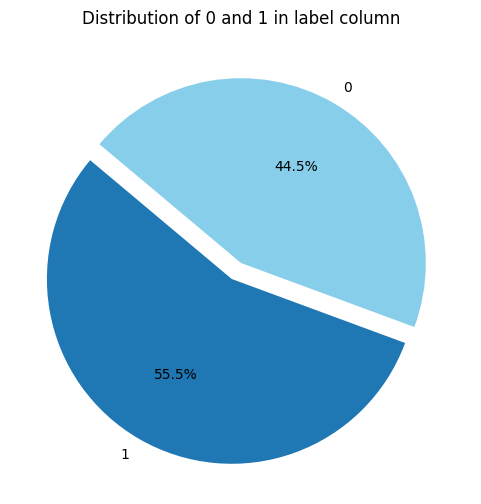

In [101]:
import matplotlib.pyplot as plt

# id 컬럼 값의 카운트
id_counts = df_data['label'].value_counts()

# 파이 차트를 그리기 위한 데이터 준비
labels = id_counts.index
sizes = id_counts.values
colors = ['#1f77b4', '#87ceeb']  # 더 어두운 색상 사용

# 파이 차트 그리기
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))
plt.title('Distribution of 0 and 1 in label column')
plt.show()

In [102]:
def readimage(path):
    #Opencv는 bgr로 이미지를 받아 rgb로 다시 변환필요.
    bgr_img = cv2.imread(path)
    b,g,r = cv2.split(bgr_img)
    rgb_img = cv2.merge([r,g,b])
    return rgb_img

Text(0, 0.5, 'REAL')

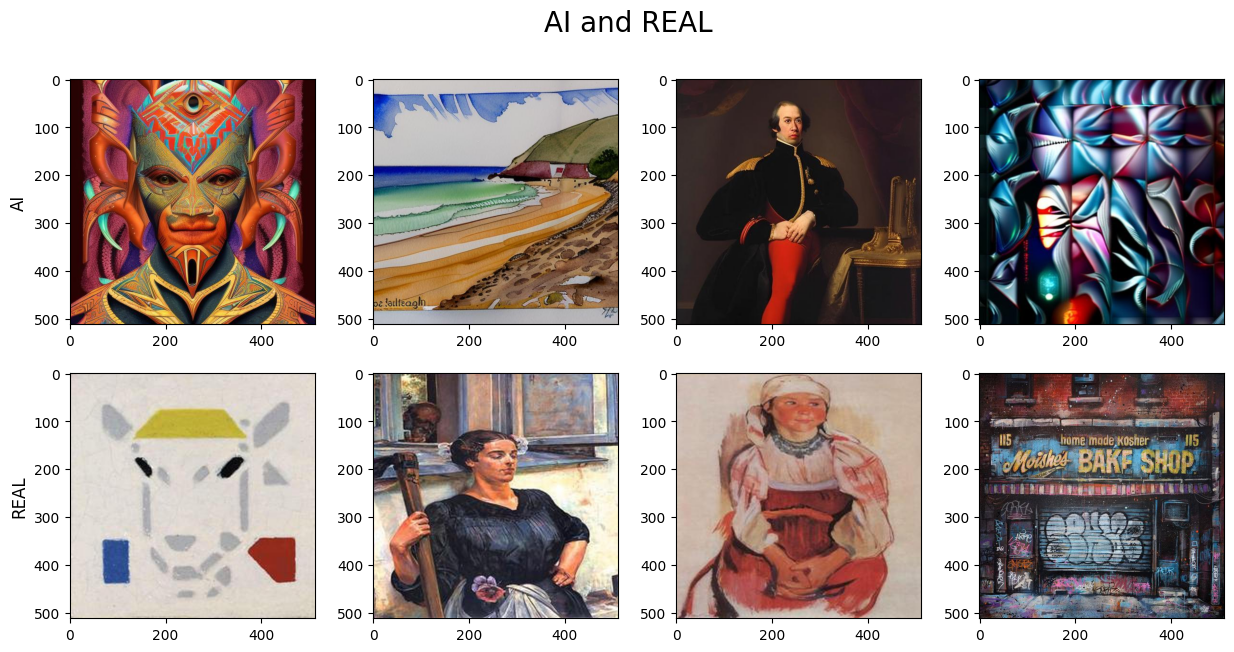

In [103]:
#데이터 섞기
shuffled_data = df_data.sample(frac=1, random_state=42).reset_index(drop=True)
fig, ax = plt.subplots(2,4, figsize=(15,7))
fig.suptitle('AI and REAL', fontsize=20)

#AI
for i, idx in enumerate(shuffled_data[shuffled_data['label']==1]['id'][:4]):
    path=os.path.join(train_dir, idx)
    ax[0,i].imshow(readimage(path))
ax[0,0].set_ylabel('AI', size='large')

#Real
for i, idx in enumerate(shuffled_data[shuffled_data['label']==0]['id'][:4]):
    path=os.path.join(train_dir, idx)
    ax[1,i].imshow(readimage(path))
ax[1,0].set_ylabel('REAL', size='large')


In [104]:
df_data.set_index('id', inplace=True)
df_data.head()


label                                  path
id                                                   
0.jpg         1     /kaggle/input/aiornot/train/0.jpg
1.jpg         1     /kaggle/input/aiornot/train/1.jpg
10.jpg        1    /kaggle/input/aiornot/train/10.jpg
100.jpg       0   /kaggle/input/aiornot/train/100.jpg
1000.jpg      0  /kaggle/input/aiornot/train/1000.jpg

In [105]:
#데이터 나누기
y = df_data['label']
df_train, df_val = train_test_split(df_data, test_size=0.3, random_state=42, stratify=y)

In [106]:
#경로설정
train_path = '/kaggle/working/train'
valid_path = '/kaggle/working/valid'
test_path = '/kaggle/input/aiornot/test'
for fold in [train_path, valid_path]:
    for subf in ["0", "1"]:
        os.makedirs(os.path.join(fold, subf), exist_ok=True)

In [107]:
import shutil
for image in df_train.index.values:
    # jpg파일 붙이기
    file_name = image
    label = str(df_data.loc[image,'label']) 
    src = os.path.join('/kaggle/input/aiornot/train', file_name)
    dst = os.path.join(train_path, label, file_name)
    shutil.copy(src, dst)#파일 복사

for image in df_val.index.values:
    # jpg파일 붙이기
    file_name = image
    label = str(df_data.loc[image,'label']) 
    src = os.path.join('/kaggle/input/aiornot/train', file_name)
    dst = os.path.join(valid_path, label, file_name)
    shutil.copy(src, dst)#파일 복사

In [108]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 256
num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 32
val_batch_size = 32

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)


datagen = ImageDataGenerator(preprocessing_function=lambda x:(x - x.mean()) / x.std() if x.std() > 0 else x,
                            horizontal_flip=True,
                            vertical_flip=True)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(image_size,image_size),
                                        batch_size=train_batch_size,
                                        class_mode='binary')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(image_size,image_size),
                                        batch_size=val_batch_size,
                                        class_mode='binary')

#shuffle=False 테스트셋은 섞지 않는다.
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(image_size,image_size),
                                        batch_size=1,
                                        class_mode='binary',
                                        shuffle=False)

Found 13032 images belonging to 2 classes.
Found 5586 images belonging to 2 classes.
Found 5586 images belonging to 2 classes.


In [109]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D, Conv1D, MaxPool1D, Reshape
from tensorflow.keras.optimizers import Adam

class SignModel(Sequential):

    def __init__(self):
        super().__init__()

        activation = 'relu'

        # 2d feature extraction
        self.add(Conv2D(32, (3, 3), activation=activation, input_shape=(256, 256, 3), padding='same'))
        self.add(Conv2D(32, (3, 3), use_bias=False, padding='same'))
        self.add(BatchNormalization())
        self.add(Activation(activation))
        self.add(MaxPool2D(pool_size=(2, 2), strides=2))
        self.add(Dropout(0.3))

        self.add(Conv2D(64, (3, 3), use_bias=False, padding='same'))
        self.add(BatchNormalization())
        self.add(Activation(activation))
        self.add(Conv2D(64, (3, 3), use_bias=False, padding='same'))
        self.add(BatchNormalization())
        self.add(Activation(activation))
        self.add(MaxPool2D(pool_size=(2, 2), strides=2))
        self.add(Dropout(0.3))

        self.add(Conv2D(128, (3, 3), use_bias=False, padding='same'))
        self.add(BatchNormalization())
        self.add(Activation(activation))
        self.add(Conv2D(128, (3, 3), use_bias=False, padding='same'))
        self.add(BatchNormalization())
        self.add(Activation(activation))
        self.add(MaxPool2D(pool_size=(2, 2), strides=2))
        self.add(Dropout(0.3))

        self.add(Flatten())
        self.add(Dense(256, use_bias=False))
        self.add(BatchNormalization())
        self.add(Activation(activation))
        self.add(Dropout(0.5))

        # Temporal encode
        self.add(Reshape((-1, 256)))  # 입력 데이터의 형태를 (None, 256)에서 (None, 256, 1)로 확장
        self.add(Conv1D(512, 5, strides=1, padding='same', activation=activation))
        self.add(MaxPool1D(2, padding='same'))

        self.add(Conv1D(512, 5, strides=1, padding='same', activation=activation))
        self.add(MaxPool1D(2, padding='same'))

        self.add(Conv1D(1024, 3, strides=1, padding='same', activation=activation))

        # Classification
        self.add(Flatten())
        self.add(Dense(1, activation='sigmoid'))

        # 모델 컴파일하기
        self.compile(optimizer=Adam(0.01), loss="binary_crossentropy", metrics=["accuracy"])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


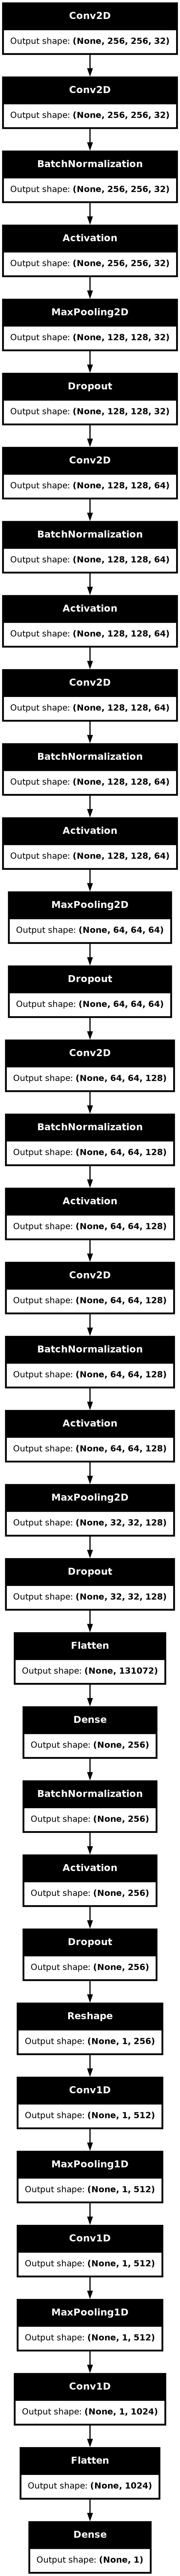

In [110]:
import tensorflow as tf
# 모델 생성
model = SignModel()

# 모델 시각화
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)


In [111]:
model.summary()

Model: "sign_model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 256, 256, 32)   │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 128, 128, 64)   │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 64, 64, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 64, 64, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 37,385,729 (142.62 MB)

 Trainable params: 37,384,385 (142.61 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [112]:
# from itertools import product
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# learning_rates = [0.001, 0.01, 0.1]
# batch_sizes = [16, 32, 64]

# for learning_rate, batch_size in product(learning_rates, batch_sizes):
#     # 모델 컴파일
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
    
#     # 콜백 설정
#     early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
#     reducel = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.1)

#     # 모델 훈련
#     history = model.fit(train_gen, 
#                         steps_per_epoch=int(train_steps), 
#                         validation_data=val_gen,
#                         validation_steps=int(val_steps),
#                         epochs=50,
#                         batch_size=batch_size,
#                         callbacks=[reducel, early_stopping])
    
#     # 결과 출력
#     print(f"Learning Rate: {learning_rate}, Batch Size: {batch_size}")
#     print("Training Accuracy:", max(history.history['accuracy']))
#     print("Validation Accuracy:", max(history.history['val_accuracy']))
#     print()


In [113]:
# from itertools import product
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# learning_rates = [0.001, 0.01, 0.1]
# batch_sizes = [16, 32, 64]

# for learning_rate, batch_size in product(learning_rates, batch_sizes):
#     # 모델 컴파일
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
    
#     # 콜백 설정
#     early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
#     reducel = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.1)

#     # 모델 훈련
#     history = model.fit(train_gen, 
#                         steps_per_epoch=int(train_steps), 
#                         validation_data=val_gen,
#                         validation_steps=int(val_steps),
#                         epochs=50,
#                         batch_size=batch_size,
#                         callbacks=[reducel, early_stopping])
    
#     # 결과 출력
#     print(f"Learning Rate: {learning_rate}, Batch Size: {batch_size}")
#     print("Training Accuracy:", max(history.history['accuracy']))
#     print("Validation Accuracy:", max(history.history['val_accuracy']))
#     print()


In [114]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5)

history = model.fit(train_gen, 
                    steps_per_epoch=int(train_steps), 
                    validation_data=val_gen,
                    validation_steps=int(val_steps),
                    epochs=50,
                    callbacks=[reducel, early_stopping])

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/408 ━━━━━━━━━━━━━━━━━━━━ 1:14 242ms/step - accuracy: 0.5484 - loss: 1.1970

W0000 00:00:1714974761.315974     355 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


408/408 ━━━━━━━━━━━━━━━━━━━━ 123s 269ms/step - accuracy: 0.6099 - loss: 0.8144 - val_accuracy: 0.7531 - val_loss: 0.4537 - learning_rate: 0.0100
Epoch 2/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0100


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 98s 237ms/step - accuracy: 0.7926 - loss: 0.4359 - val_accuracy: 0.8165 - val_loss: 0.3586 - learning_rate: 0.0100
Epoch 4/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0100
Epoch 5/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 98s 237ms/step - accuracy: 0.8281 - loss: 0.3610 - val_accuracy: 0.8514 - val_loss: 0.3241 - learning_rate: 0.0100
Epoch 6/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0100
Epoch 7/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.8459 - loss: 0.3384
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
408/408 ━━━━━━━━━━━━━━━━━━━━ 98s 238ms/step - accuracy: 0.8459 - loss: 0.3384 - val_accuracy: 0.8126 - val_loss: 0.4567 - learning_rate: 0.0100
Epoch 8/50
408/408 ━━━━━━━━━━━━━━━━━━━━ 0s 30

In [115]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

#prediction 적용
y_pred_keras = model.predict(test_gen, steps=len(df_val), verbose=1)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras


5586/5586 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step


0.868591603735358

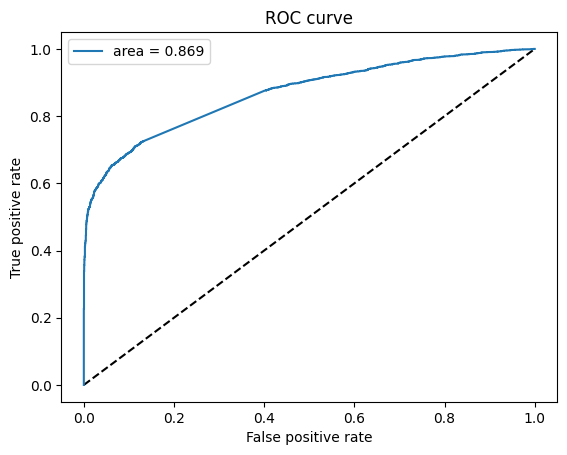

In [116]:
#Roc커브 확인하기
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [117]:
import os
import glob
import cv2
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

base_test_dir = '/kaggle/input/aiornot/test'
test_files = glob.glob(os.path.join(base_test_dir, '*.jpg'))
submission = pd.DataFrame()
file_batch = 100
max_idx = len(test_files)

test_ids = []

for idx in range(0, max_idx, file_batch):
    print("Indexes: %i - %i" % (idx, idx + file_batch))
    test_df = pd.DataFrame({'path': test_files[idx:idx + file_batch]})
    test_df['id'] = test_df.path.map(lambda x: x.split('/')[-1].split('.')[0])
    test_ids.extend(test_df['id'])

    images = []
    for path in test_df['path']:
        frame = cv2.imread(path)
        frame = cv2.resize(frame, (256, 256))  # 이미지 크기를 (256, 256)으로 조정합니다.
        images.append(frame)

    K_test = np.array(images)
    K_test = (K_test - K_test.mean()) / K_test.std()

    # 모델로 예측
    predictions = model.predict(K_test)
    predictions = list(map(lambda x: 0 if x < 0.5 else 1, predictions))  # 임계값 0.5 기준으로 나누기
    test_df['predict'] = predictions
    submission = pd.concat([submission, test_df[["id", "predict"]]])

submission.head()

df_test = pd.read_csv('/kaggle/input/aiornot/test.csv')
df_test['id'] = df_test['id'].astype('str')
check_results = pd.merge(submission, df_test, on='id')

Indexes: 0 - 100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step
Indexes: 100 - 200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 200 - 300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 300 - 400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 400 - 500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 500 - 600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 600 - 700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 700 - 800
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 800 - 900
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 900 - 1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 1000 - 1100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 1100 - 1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 1200 - 1300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 1300 - 1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 1400 - 1500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 1500 - 1600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 1600 - 1700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Indexes: 1700 - 1

In [118]:
submission['id'] = submission['id'] + '.jpg'

In [119]:
submission

id  predict
0   31973.jpg        1
1   30778.jpg        1
2   19812.jpg        1
3   22735.jpg        0
4   38246.jpg        0
..        ...      ...
37   2599.jpg        0
38  10035.jpg        1
39  31745.jpg        1
40  11590.jpg        1
41  23579.jpg        1

[43442 rows x 2 columns]

In [120]:
df_test = pd.read_csv('/kaggle/input/aiornot/test.csv')
df_test['id'] = df_test['id'].astype('str')
check_results = pd.merge(submission, df_test, on='id')

In [121]:
check_results

id  predict  label    split
0      31973.jpg        1      0  private
1      30778.jpg        1      1   public
2      19812.jpg        1      1   public
3      22735.jpg        0      0   public
4      38246.jpg        0      0   public
...          ...      ...    ...      ...
43437   2599.jpg        0      1   public
43438  10035.jpg        1      1   public
43439  31745.jpg        1      1   public
43440  11590.jpg        1      1   public
43441  23579.jpg        1      1   public

[43442 rows x 4 columns]

Accuracy: 0.7153
F1 Score: 0.7004


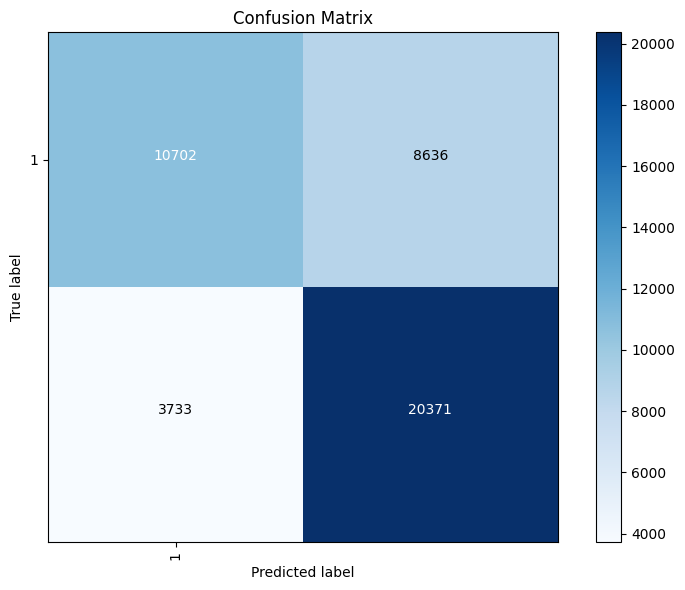


Classification report:

              precision    recall  f1-score   support

           0     0.7414    0.5534    0.6338     19338
           1     0.7023    0.8451    0.7671     24104

    accuracy                         0.7153     43442
   macro avg     0.7218    0.6993    0.7004     43442
weighted avg     0.7197    0.7153    0.7078     43442



In [122]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools

# Extract the true labels from the model outputs
y_true = check_results["label"].values

# Predict the labels by selecting the class with the highest probability
y_pred = check_results["predict"].values

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='macro')

# Display accuracy and F1 score
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Define a function to plot a confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues, figsize=(10, 8)):
    """
    This function plots a confusion matrix.

    Parameters:
        cm (array-like): Confusion matrix as returned by sklearn.metrics.confusion_matrix.
        classes (list): List of class names, e.g., ['Class 0', 'Class 1'].
        title (str): Title for the plot.
        cmap (matplotlib colormap): Colormap for the plot.
    """
    # Create a figure with a specified size
    plt.figure(figsize=figsize)
    
    # Display the confusion matrix as an image with a colormap
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # Define tick marks and labels for the classes on the axes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.0f'
    # Add text annotations to the plot indicating the values in the cells
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    # Label the axes
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Ensure the plot layout is tight
    plt.tight_layout()
    # Display the plot
    plt.show()

# Get the confusion matrix if there are a small number of labels
if check_results["label"].nunique() <= 150:
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix using the defined function
    plot_confusion_matrix(cm, label, figsize=(8, 6))

labels = np.unique(y_true)
# Finally, display classification report
print()
print("Classification report:")
print()
print(classification_report(y_true, y_pred, labels=labels, digits=4))

In [135]:
import cv2
import numpy as np
import pandas as pd

# 새로운 이미지를 읽고 전처리하는 함수
def preprocess_image(image_path):
    frame = cv2.imread(image_path)
    frame = cv2.resize(frame, (256, 256))  # 이미지 크기를 (256, 256)으로 조정합니다.
    # 이미지 픽셀 값의 평균을 0으로, 표준 편차를 1로 정규화합니다.
    preprocessed_image = (frame - frame.mean()) / frame.std()
    return preprocessed_image


# 새로운 이미지가 있는 디렉토리 경로
new_image_dir = '/kaggle/input/232323/123qqsss'

# 디렉토리 안의 모든 이미지 파일 경로 가져오기
new_image_files = [os.path.join(new_image_dir, f) for f in os.listdir(new_image_dir) if os.path.isfile(os.path.join(new_image_dir, f))]

# 모든 이미지에 대해 예측 수행
for new_image_path in new_image_files:
    # 이미지 전처리
    new_image = preprocess_image(new_image_path)

    # 모델로 예측
    prediction = model.predict(np.array([new_image]))
    
    # 예측 결과 출력
    print(f"Image: {new_image_path}, Prediction: {'Not AI' if prediction > 0.5 else 'AI'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: /kaggle/input/232323/123qqsss/1-4.png, Prediction: Not AI
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/232323/123qqsss/0-222.jpeg, Prediction: AI
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Image: /kaggle/input/232323/123qqsss/0-777.jpg, Prediction: AI
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image: /kaggle/input/232323/123qqsss/0-2.jpg, Prediction: AI
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/232323/123qqsss/0-2323.jpg, Prediction: AI
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: /kaggle/input/232323/123qqsss/0-7.jpeg, Prediction: AI
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/232323/123qqsss/0-231234.jpeg, Prediction: Not AI
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/232323/123qqsss/1-1.jpg, Prediction: Not AI
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/232323/123qqsss/1-2.png, Prediction: AI
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /kaggle/input/232323/123qqsss/1-3.jpg